In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-1.-데이터-핸들링\1. 데이터 핸들링\데이터')

In [2]:
df = pd.read_csv('2019년_시간대별_상품판매량.csv', engine='python')
df.head()

,날짜,상품1,상품2,상품3
0,2019-01-01,48,48,50
1,2019-01-02,48,44,49
2,2019-01-03,48,54,50
3,2019-01-04,53,42,48
4,2019-01-05,46,42,50


In [4]:
# 기본 환경설정
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic' # 한글을 쓸 경우 깨질 수 있어서 무조건 폰트를 지정하는게 좋음
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (30,10)

#### pyplot을 사용한 그래프 그리기

## color
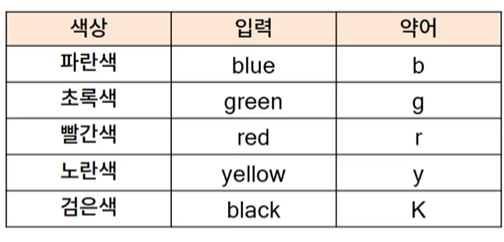

## marker & linestyle
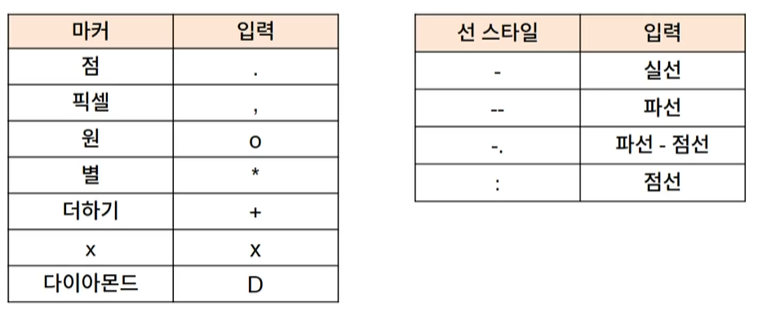

## label & title
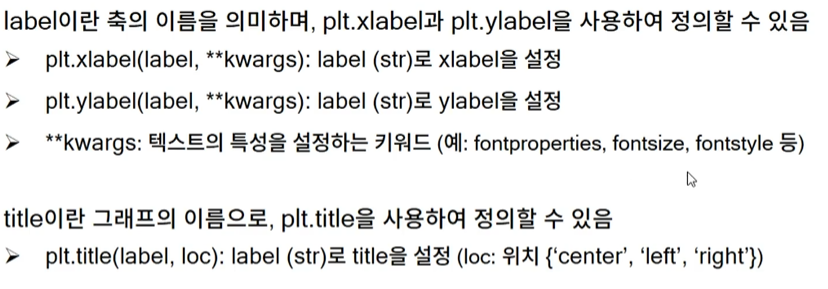

## tick
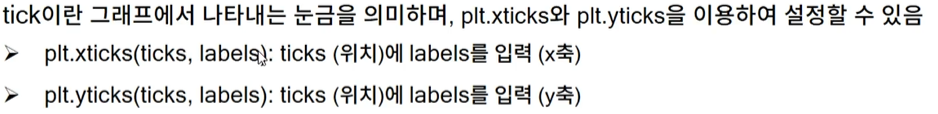

In [6]:
np.cumsum([1, 2, 3]) # 누적합 반환

array([1, 3, 6], dtype=int32)

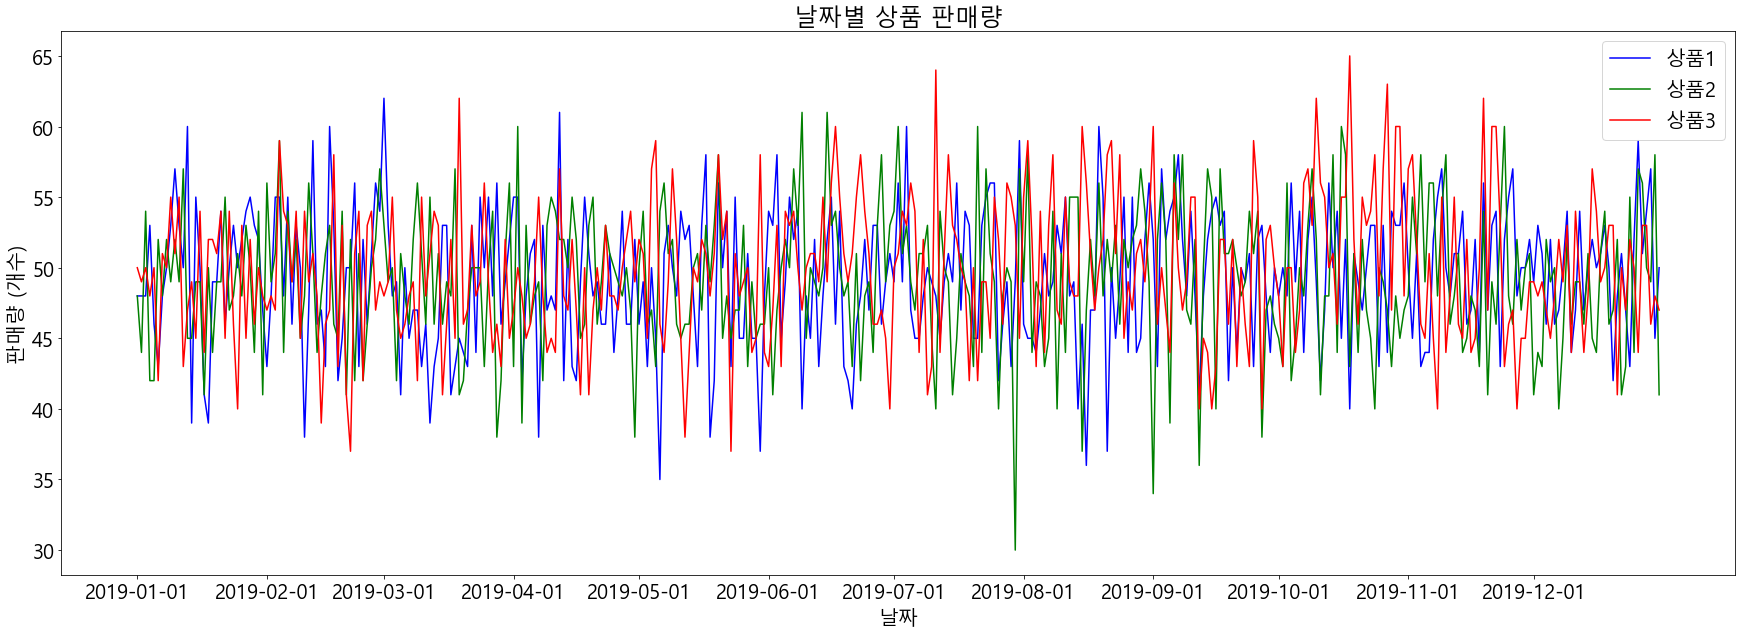

In [8]:
# 그래프 기본 설정
plt.title("날짜별 상품 판매량")
plt.xlabel('날짜')
plt.ylabel('판매량 (개수)')

xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])
plt.xticks(xtick_range, df['날짜'].loc[xtick_range])

plt.plot(df['날짜'],df['상품1'],label = '상품1', color = 'b')
plt.plot(df['날짜'], df['상품2'], label = '상품2', color = 'g')
plt.plot(df['날짜'], df['상품3'], label = '상품3', color = 'r')

plt.legend()

([<matplotlib.axis.XTick at 0x1ff5073a430>,
 [Text(0, 0, '2019-01-01'),
  Text(0, 0, '2019-02-01'),
  Text(0, 0, '2019-03-01'),
  Text(0, 0, '2019-04-01'),
  Text(0, 0, '2019-05-01'),
  Text(0, 0, '2019-06-01'),
  Text(0, 0, '2019-07-01'),
  Text(0, 0, '2019-08-01'),
  Text(0, 0, '2019-09-01'),
  Text(0, 0, '2019-10-01'),
  Text(0, 0, '2019-11-01'),
  Text(0, 0, '2019-12-01')])

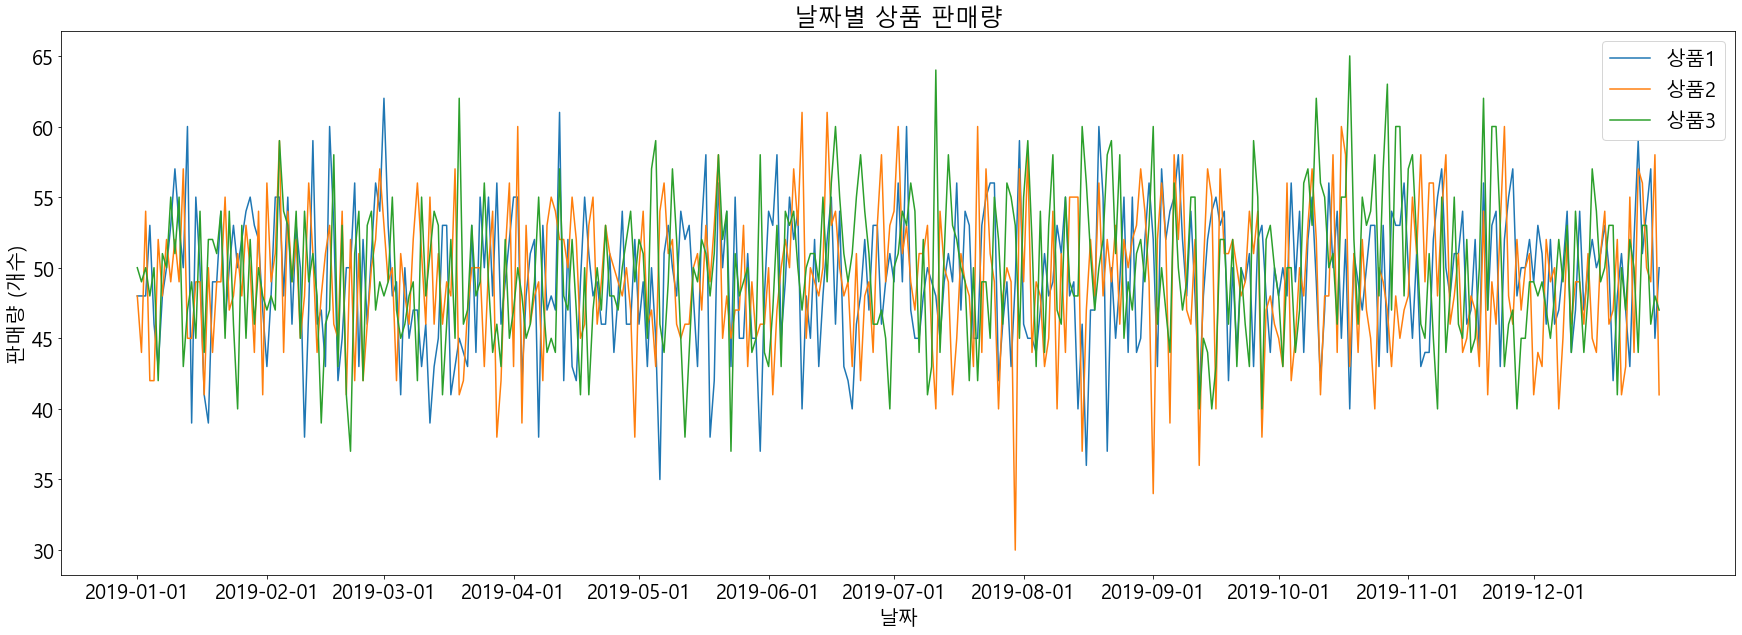

In [9]:
# 그래프 기본 설정
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
df.plot(kind = 'line', x = '날짜', y = ['상품1', '상품2', '상품3'])

plt.title("날짜별 상품 판매량")
plt.xlabel("날짜")
plt.ylabel("판매량 (개수)")
plt.xticks(xtick_range, df['날짜'].loc[xtick_range])

#### groupby를 이용한 그래프 그리기

In [10]:
df['날짜'].head()

0    2019-01-01
1    2019-01-02
2    2019-01-03
3    2019-01-04
4    2019-01-05
Name: 날짜, dtype: object

In [11]:
df['날짜'].str.split('-', expand = True).head()

,0,1,2
0,2019,01,01
1,2019,01,02
2,2019,01,03
3,2019,01,04
4,2019,01,05


In [12]:
df['월'] = df['날짜'].str.split('-', expand = True).iloc[:, 1]

In [13]:
df.head()

,날짜,상품1,상품2,상품3,월
0,2019-01-01,48,48,50,01
1,2019-01-02,48,44,49,01
2,2019-01-03,48,54,50,01
3,2019-01-04,53,42,48,01
4,2019-01-05,46,42,50,01


In [14]:
df.groupby('월')[['상품1', '상품2', '상품3']].sum()

,상품1,상품2,상품3
월,,,
01,1545,1501,1521
02,1391,1388,1372
03,1488,1510,1514
04,1461,1483,1449
05,1485,1511,1530
06,1473,1508,1513
07,1548,1519,1558
08,1494,1545,1599
09,1506,1480,1464


([<matplotlib.axis.XTick at 0x1ff507fa0a0>,
 [Text(0, 0, '1월'),
  Text(0, 0, '2월'),
  Text(0, 0, '3월'),
  Text(0, 0, '4월'),
  Text(0, 0, '5월'),
  Text(0, 0, '6월'),
  Text(0, 0, '7월'),
  Text(0, 0, '8월'),
  Text(0, 0, '9월'),
  Text(0, 0, '10월'),
  Text(0, 0, '11월'),
  Text(0, 0, '12월')])

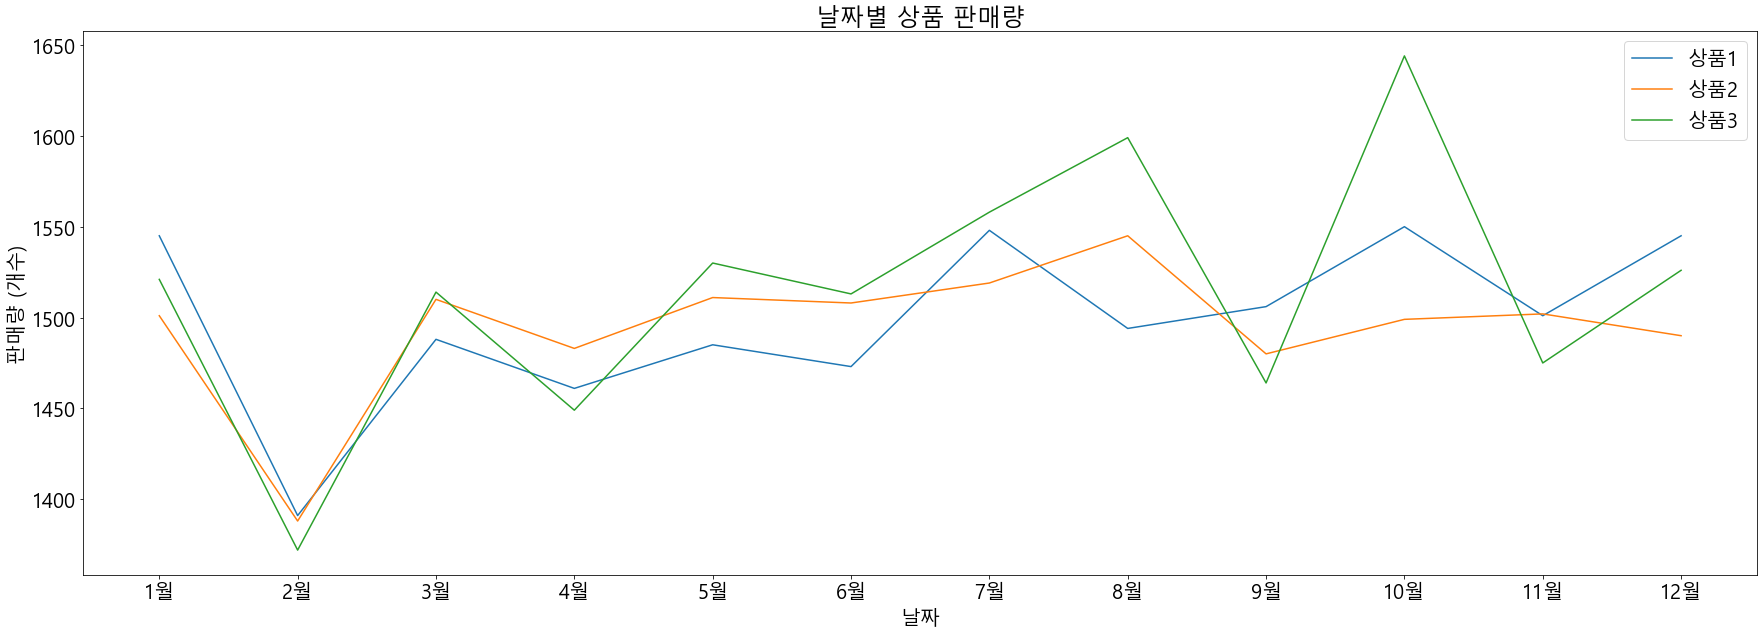

In [15]:
df.groupby('월')[['상품1', '상품2', '상품3']].sum().plot(kind = 'line') # default를 썼으므로, 인덱스가 x축으로 모든 컬럼이 y축으로 들어감
plt.title("날짜별 상품 판매량")
plt.xlabel("날짜")
plt.ylabel("판매량 (개수)")
plt.xticks(range(12), [str(i + 1) + '월' for i in range(12)])